In [1]:
# Calculate what the doppler drift would be for different frequencies 
# for transmitters traveling at different speeds and how that
# compares to the COSMIC sensitivity


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Given a relative acceleration between transmitter
# and observer in m/s^2 and a frequency in Hz
# returns the drift rate in Hz/s
# From https://arxiv.org/pdf/1910.01148
def drift_rate(acceleration, frequency):
    c = 3e8 # m/s
    return frequency * acceleration / c

In [4]:
# Look at affect of acceleration from Earth's rotation
# at maximum
radius = 6371 * 1000 # meters
circumference = 2 * np.pi * radius # meters
s_in_day = 1 * 24 * 60 * 60 # seconds
tangential_velocity = circumference / s_in_day # m/s
centripetal_acc = tangential_velocity**2 / radius # m/s^2

In [5]:
centripetal_acc

0.03369301356703334

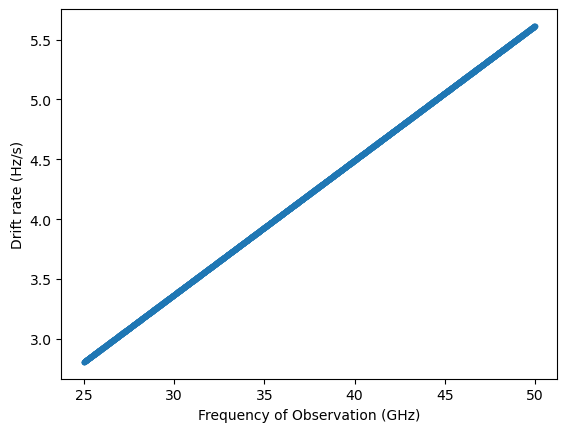

In [6]:
frequencies = np.arange(25e9, 50e9, 1e7) # 25-50GHz
plt.plot(frequencies / 1e9, drift_rate(centripetal_acc, frequencies), marker='.')
plt.xlabel("Frequency of Observation (GHz)")
plt.ylabel("Drift rate (Hz/s)")
plt.show()

In [7]:
# Figure out what acceleration an object must be going to have a drift rate > .25hz/s
drift_threshold = 0.25 # hz/s
def accel_from_drift(drift, frequency):
    c = 3e8 # m/s
    return drift * c / frequency

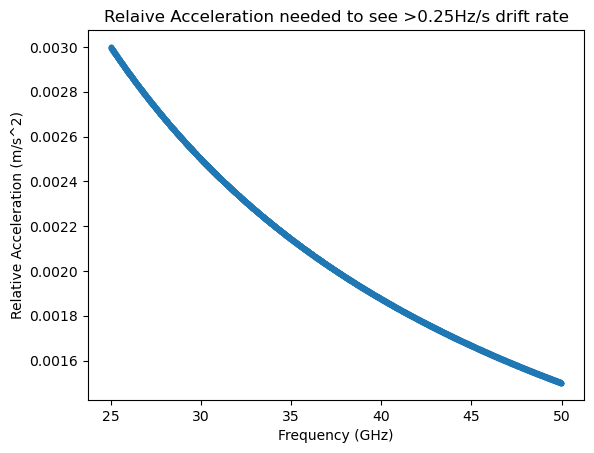

In [8]:
frequencies = np.arange(25e9, 50e9, 1e7) # 25-50GHz
plt.plot(frequencies / 1e9, accel_from_drift(drift_threshold, frequencies), marker='.')
plt.xlabel("Frequency (GHz)")
plt.ylabel("Relative Acceleration (m/s^2)")
plt.title("Relaive Acceleration needed to see >0.25Hz/s drift rate")
plt.show()

In [9]:
# But what (max) accelerations are we going to see for satellites in orbit? 
# Obviously a geostationary satellite would be an acceleration of 0
# Because its orbital velocity is the same speed the ground is moving

In [10]:
geostationary_altitude = 35_786_000 # meters
geostationary_radius = geostationary_altitude + radius # meters

# Given a distance from the center of the Earth, what's the 
# velocity of a stable circular orbit?
# Returns velocity in m/s
def orbital_velocity(r):
    G = 6.67e-11 # G units in SI
    M = 5.927e24 # kg
    return np.sqrt(G * M / r)

geostationary_v = orbital_velocity(geostationary_radius)

# Double check the math, should be that it completes one orbit in one day
geostationary_circumference = geostationary_radius * 2 * np.pi # m
geostationary_orbital_time = geostationary_circumference / geostationary_v 
print(geostationary_orbital_time / 86400 )

# Okay so I forgot there were some rotational frame of reference effecs
# The geostationary satellite "appears" to be stationary even though it's moving a lot faster than we are
# Our LOS (Line of sight) or radial velocity is going to be 0 though
# To get the line of sight velocity for a satellite in some other equatorial circular orbit is going to
# take a little more math, todo later

1.001129576536307


In [11]:
geostationary_v**2 / geostationary_radius

0.22244434295605783

In [12]:
# From Li et Al (2023?)
rel_drift_rate_cutoff = 50e-9 # drift rate / frequency cutoff for 99% on exoplanets
print(rel_drift_rate_cutoff * 25e9, "Hz/s")
print(rel_drift_rate_cutoff * 50e9, "Hz/s")

1250.0 Hz/s
2500.0 Hz/s
